In [2]:
#from slice_sampler import SliceSampler
#from mh_componentwise import MetropolisHastingsComponentwise
from samplers import SliceSampler
#import de_mcmc_one_core as demcmc
import numpy as np
import scipy.stats as scps
import pickle
import matplotlib.pyplot as plt

In [4]:
def normal_target(params, data):
    lp = 0
    for i in range(data.shape[0]):
        lp += scps.norm.logpdf(data[i], loc = params[0], scale = params[1])
    return lp

In [5]:
data = np.random.normal(loc = 0, scale = 2, size = 100)
bounds = np.array([[-10, 10], [0.1, 5]])

In [6]:
my_slice_sampler = SliceSampler(bounds = bounds, target = normal_target)

In [7]:
my_slice_sampler.sample(data, num_samples = 100, method = 'doubling', init = 'random', add = False)

Beginning sampling...
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Iteration 37
Iteration 38
Iteration 39
Iteration 40
Iteration 41
Iteration 42
Iteration 43
Iteration 44
Iteration 45
Iteration 46
Iteration 47
Iteration 48
Iteration 49
Iteration 50
Iteration 51
Iteration 52
Iteration 53
Iteration 54
Iteration 55
Iteration 56
Iteration 57
Iteration 58
Iteration 59
Iteration 60
Iteration 61
Iteration 62
Iteration 63
Iteration 64
Iteration 65
Iteration 66
Iteration 67
Iteration 68
Iteration 69
Iteration 70
Iteration 71
Iteration 72
Iteration 73
Iteration 74
Iteration 75
Iteration 76

In [ ]:
plt.scatter(my_slice_sampler.samples[400:, 0], my_slice_sampler.samples[400:, 1])
plt.xlabel('mean')
plt.ylabel('sd')

In [ ]:
plt.hist(my_slice_sampler.samples[400:, 0])

In [ ]:
plt.hist(my_slice_sampler.samples[400:, 1])

In [ ]:
my_slice_sampler.samples.shape

In [ ]:
# Metropolis Hastings componentwise
mh_sampler = MetropolisHastingsComponentwise(dims = 2,
                                             num_chains = 4, 
                                             bounds = bounds, 
                                             target = normal_target, 
                                             proposal_var = 0.1)

In [ ]:
mh_sampler.sample(data = data, num_samples = 500, add = True, n_cores = 4)

In [ ]:
# SOME GRAPHS
plt.scatter(mh_sampler.samples[:, 2, :][:, 0], mh_sampler.samples[:, 2, :][:, 1], alpha = 0.01)

In [ ]:
plt.plot(np.arange(0, 3000, 1), mh_sampler.samples[:, 1, :][:, 1])

In [ ]:
plt.plot(np.arange(0, 3000, 1), mh_sampler.samples[:, 1, :][:, 0])

In [ ]:
plt.hist(mh_sampler.samples[1500:, 2, :][:, 0], bins = 30)

In [ ]:
plt.hist(mh_sampler.samples[1500:, 2, :][:, 1], bins = 30)

In [ ]:
mh_sampler.samples[101, :, :]

In [ ]:
# DEMCMC
my_demcmc = demcmc.DifferentialEvolutionSequential(bounds = bounds, target = normal_target)

In [ ]:
my_demcmc.sample(data = data, num_samples = 2000, add = False, crossover = True, anneal_k = 1 / 50)

In [ ]:
plt.plot(np.arange(0, 2000, 1), my_demcmc.samples[:, 3, :][:, 0])

In [ ]:
plt.plot(np.arange(0,2000, 1), my_demcmc.samples[:, 3, :][:, 1])

In [ ]:
plt.hist(my_demcmc.samples[:, 4, :][500:, 1], bins = 10)

In [ ]:
def flipped_logistic(x = 0, x_0 = 100, k = 1, L = 10):
    return 1 + 2*L - (2*L / (1 + np.exp(-k * (x - x_0))))

In [ ]:
t = np.linspace(0, 2000, 1000)
x = np.zeros(1000)
y = np.zeros(1000)

In [ ]:
x_0 = 100
k = 1
L = 10
cnt = 0
for tmp in t:
    x[cnt] = flipped_logistic(x = tmp, x_0 = 0, k = 1/50, L = 10)
    cnt += 1

In [ ]:
plt.plot(t, x)

In [ ]:
x[500]

In [ ]:
np.sqrt(np.var(data))

In [ ]:
np.mean(data)

In [ ]:
h = 0

In [ ]:
h == 'hello'

In [310]:
file_params = '/media/data_cifs/afengler/data/kde/ddm/parameter_recovery_data_binned_0_nbins_0_n_1024/ddm_nchoices_2_parameter_recovery_binned_0_nbins_0_nreps_1_n_1024.pickle' 
file_samples = '/media/data_cifs/afengler/data/kde/levy/method_comparison/post_samp_data_param_recov_unif_reps_1_n_1024_1_1.pickle'
tmp = '/media/data_cifs/afengler/data/kde/angle/parameter_recovery_data_binned_0_nbins_0_n_1024/angle_nchoices_2_parameter_recovery_binned_0_nbins_0_nreps_1_n_1024.pickle'
params = pickle.load(open(file_params, 'rb'))
samples = pickle.load(open(file_samples, 'rb'))
tmp_ = pickle.load(open(tmp, 'rb'))

In [330]:
params = samples[0]

In [295]:
samples[0]

array([[-1.1575769 ,  0.692802  ,  0.4028475 ,  1.5489433 ,  1.3233017 ],
       [-1.1892633 ,  1.8953338 ,  0.32800055,  1.7455443 ,  0.27510357],
       [ 1.5811496 ,  0.86026317,  0.4564294 ,  1.7729104 ,  1.8445481 ],
       [ 0.5164373 ,  1.4227382 ,  0.42325163,  1.5912231 ,  1.4489318 ],
       [-0.77834296,  0.6837631 ,  0.5652527 ,  1.198079  ,  1.7352266 ],
       [ 0.6296465 ,  0.98677224,  0.44922706,  1.839325  ,  0.43826288],
       [ 0.91887236,  1.2428666 ,  0.30440792,  1.819357  ,  1.4170233 ],
       [-1.6346052 ,  1.1225064 ,  0.5637675 ,  1.8637477 ,  1.1348745 ],
       [ 0.5687864 ,  1.611033  ,  0.3446814 ,  1.6270367 ,  1.5942202 ],
       [-0.23311013,  1.8939635 ,  0.5420388 ,  1.2773701 ,  0.22092362]],
      dtype=float32)

In [296]:
data = samples[1]

In [218]:
samps = samples[2][0]

In [311]:
samples_tmp2 = np.array([samples[2][i][0][:, 2000:4000, :] for i in range(10)])
samples_tmp1 = samples_tmp2.reshape((10, -1, 5))

In [298]:
samples_tmp2.shape

(10, 25, 2000, 5)

In [312]:
logliks = np.array([samples[2][i][1][:, 2000:4000] for i in range(10)])

In [313]:
means_logliks = np.mean(logliks, 2)

In [314]:
means_logliks.shape

(10, 25)

In [240]:
samples[2][1][1]#[:, :100, :].shape

array([[ -8276.73730469,  -6422.09570312,  -5412.07958984, ...,
         -1095.47900391,  -1095.47900391,  -1095.47900391],
       [-11576.28417969, -11530.24707031, -11530.24707031, ...,
         -1094.11499023,  -1094.11499023,  -1094.11083984],
       [-13817.07226562, -13700.39648438, -13700.39648438, ...,
         -1113.22436523,  -1113.22436523,  -1113.28637695],
       ...,
       [-13841.05371094, -13841.05371094, -13841.05371094, ...,
         -1115.86450195,  -1113.63562012,  -1113.63562012],
       [-11143.26953125, -10645.2421875 ,  -8967.85546875, ...,
         -1093.71252441,  -1093.71252441,  -1093.71252441],
       [-11549.12890625, -11411.68066406, -11411.68066406, ...,
         -1096.21240234,  -1096.46508789,  -1096.46508789]])

In [268]:
x = np.zeros((10, 20))
for i in range(samples[2].shape[0]):
    for j in range(samples[2].shape[1]):
        #print(np.sum((samples[2][i, j, :, 1] == 0)))
       # print(i, j)

SyntaxError: unexpected EOF while parsing (<ipython-input-268-455126e50236>, line 5)

In [128]:
samples_tmp = samples[2][:, :, 4000:10000, :].reshape((10, -1, 5))

In [244]:
samples_tmp2 = samples[2][:, :, 4000:10000, :]

TypeError: list indices must be integers or slices, not tuple

In [88]:
samples_tmp.shape

(10, 16000, 4)

In [192]:
samples[0][4, :]

array([-1.2864327 ,  1.4507163 ,  0.5252409 ,  0.48271847,  0.43832585],
      dtype=float32)

In [326]:
samples[0][0, 0, :, 0]

IndexError: too many indices for array

In [ ]:
samples[0][1, :]

In [255]:
samples_tmp2.shape

(10, 20, 2000, 5)

In [333]:
params[0, :]

array([-1.1575769,  0.692802 ,  0.4028475,  1.5489433,  1.3233017],
      dtype=float32)

In [315]:
means_tmp2 = np.mean(samples_tmp2[0, :, :, :], axis = 1)

In [316]:
logliks.shape

(10, 25, 2000)

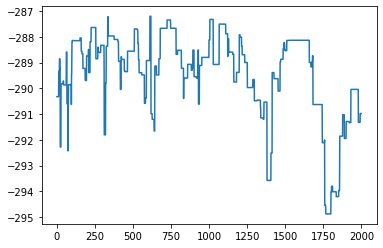

In [317]:
plt.plot(logliks[0, 0, :])

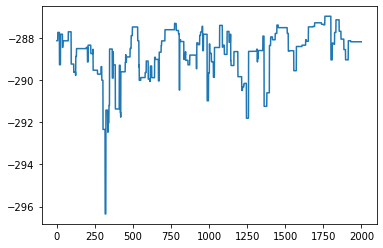

In [318]:
plt.plot(logliks[0, 5, :])

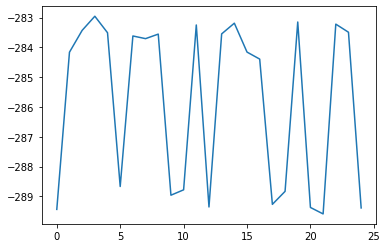

In [319]:
plt.plot(means_logliks[0, :])

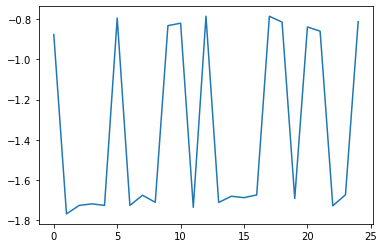

In [320]:
plt.plot(means_tmp2[:, 0])


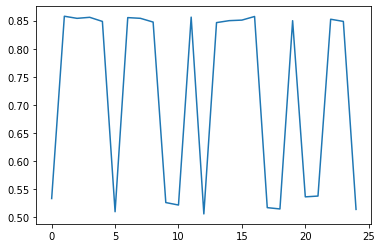

In [321]:
plt.plot(means_tmp2[:, 1])

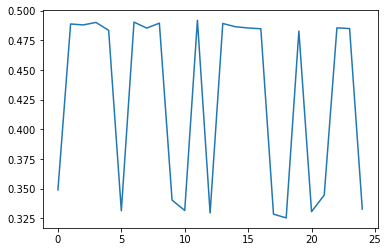

In [322]:
plt.plot(means_tmp2[:, 2])

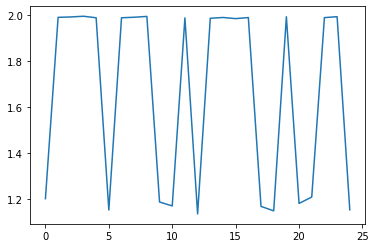

In [323]:
plt.plot(means_tmp2[:, 3])

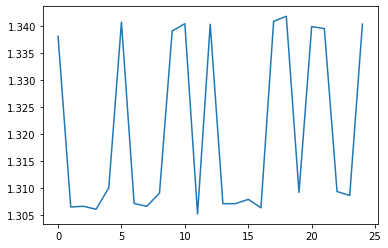

In [307]:
plt.plot(means_tmp2[:, 4])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5642207ef0>,
      dtype=object)

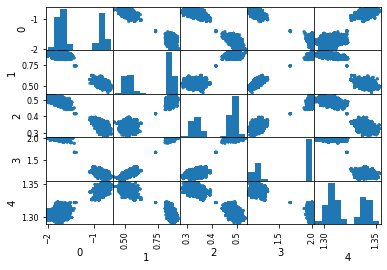

In [324]:
import pandas as pd
x = pd.DataFrame(samples_tmp1[0, :, :])
pd.plotting.scatter_matrix(x)

In [ ]:
s

(array([6.2002e+04, 1.1340e+04, 9.9050e+03, 7.5550e+03, 6.6240e+03,
        5.0890e+03, 4.1050e+03, 3.0280e+03, 2.4080e+03, 1.8770e+03,
        1.3520e+03, 1.1630e+03, 8.1100e+02, 7.2700e+02, 4.6900e+02,
        3.7100e+02, 3.2500e+02, 2.0700e+02, 1.3400e+02, 6.8000e+01,
        1.0900e+02, 5.2000e+01, 1.2300e+02, 4.3000e+01, 2.2000e+01,
        2.1000e+01, 1.9000e+01, 4.0000e+00, 2.2000e+01, 2.5000e+01]),
 array([-2.        , -1.99622341, -1.99244681, -1.98867022, -1.98489362,
        -1.98111703, -1.97734043, -1.97356384, -1.96978724, -1.96601065,
        -1.96223405, -1.95845746, -1.95468086, -1.95090427, -1.94712767,
        -1.94335108, -1.93957449, -1.93579789, -1.9320213 , -1.9282447 ,
        -1.92446811, -1.92069151, -1.91691492, -1.91313832, -1.90936173,
        -1.90558513, -1.90180854, -1.89803194, -1.89425535, -1.89047875,
        -1.88670216]),
 <a list of 30 Patch objects>)

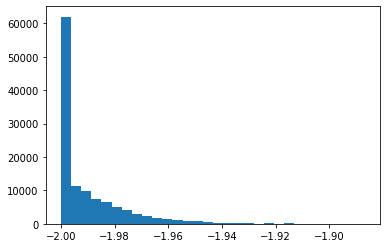

In [129]:
plt.hist(samples_tmp[0, :, 0], bins = 30)

(array([2.7000e+01, 4.9000e+01, 1.6800e+02, 3.2700e+02, 6.1900e+02,
        1.4040e+03, 2.3910e+03, 3.3420e+03, 5.1720e+03, 7.7390e+03,
        9.9520e+03, 1.1714e+04, 1.2357e+04, 1.3079e+04, 1.3085e+04,
        9.9520e+03, 8.5860e+03, 6.8580e+03, 5.0750e+03, 3.2880e+03,
        2.1360e+03, 1.1500e+03, 7.9100e+02, 3.1400e+02, 2.2700e+02,
        1.0400e+02, 2.9000e+01, 5.5000e+01, 3.0000e+00, 7.0000e+00]),
 array([0.44000742, 0.44198658, 0.44396574, 0.4459449 , 0.44792406,
        0.44990323, 0.45188239, 0.45386155, 0.45584071, 0.45781987,
        0.45979903, 0.46177819, 0.46375735, 0.46573652, 0.46771568,
        0.46969484, 0.471674  , 0.47365316, 0.47563232, 0.47761148,
        0.47959064, 0.4815698 , 0.48354897, 0.48552813, 0.48750729,
        0.48948645, 0.49146561, 0.49344477, 0.49542393, 0.49740309,
        0.49938226]),
 <a list of 30 Patch objects>)

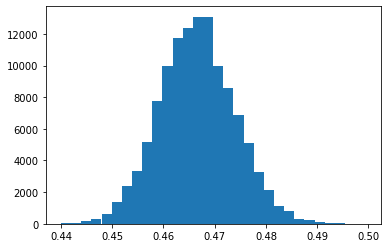

In [130]:
plt.hist(samples_tmp[0, :, 1], bins = 30)

(array([2.700e+01, 4.000e+00, 2.400e+01, 3.700e+01, 6.000e+01, 1.060e+02,
        1.060e+02, 2.510e+02, 2.330e+02, 4.070e+02, 6.300e+02, 7.720e+02,
        1.036e+03, 1.413e+03, 2.298e+03, 2.853e+03, 3.926e+03, 5.081e+03,
        5.886e+03, 9.485e+04]),
 array([0.77743527, 0.7785635 , 0.77969174, 0.78081998, 0.78194821,
        0.78307645, 0.78420469, 0.78533292, 0.78646116, 0.7875894 ,
        0.78871763, 0.78984587, 0.79097411, 0.79210234, 0.79323058,
        0.79435882, 0.79548705, 0.79661529, 0.79774353, 0.79887176,
        0.8       ]),
 <a list of 20 Patch objects>)

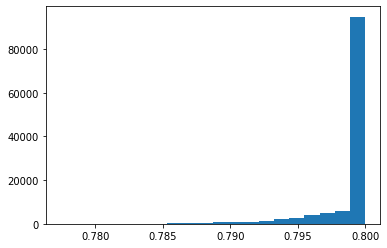

In [131]:
plt.hist(samples_tmp[0, :, 2], bins = 20)

(array([5.4000e+01, 0.0000e+00, 1.2000e+01, 6.0000e+00, 1.3000e+01,
        1.2000e+01, 9.0000e+00, 1.0000e+00, 1.0000e+01, 0.0000e+00,
        3.0000e+00, 2.0000e+01, 1.6000e+01, 2.0000e+00, 3.0000e+00,
        0.0000e+00, 5.5000e+01, 6.9000e+01, 5.8000e+01, 9.1000e+01,
        2.8800e+02, 5.0500e+02, 9.9000e+02, 2.1180e+03, 3.3020e+03,
        6.1460e+03, 9.9560e+03, 1.3759e+04, 1.6628e+04, 1.7590e+04,
        1.6614e+04, 1.3298e+04, 9.5660e+03, 5.2410e+03, 2.1860e+03,
        9.5000e+02, 3.2700e+02, 7.5000e+01, 1.0000e+01, 1.7000e+01]),
 array([-1.        , -0.96598142, -0.93196284, -0.89794426, -0.86392568,
        -0.8299071 , -0.79588852, -0.76186994, -0.72785136, -0.69383278,
        -0.6598142 , -0.62579562, -0.59177704, -0.55775846, -0.52373988,
        -0.4897213 , -0.45570272, -0.42168414, -0.38766556, -0.35364698,
        -0.3196284 , -0.28560982, -0.25159124, -0.21757266, -0.18355408,
        -0.1495355 , -0.11551692, -0.08149834, -0.04747976, -0.01346118,
         0.02055

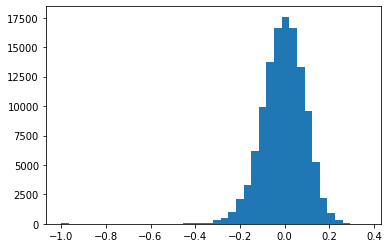

In [132]:
plt.hist(samples_tmp[0, :, 3], bins = 40)

(array([2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.1000e+01,
        2.0000e+01, 5.0000e+00, 5.8000e+01, 5.1000e+01, 1.3300e+02,
        2.3500e+02, 3.1600e+02, 6.1800e+02, 9.8100e+02, 1.8710e+03,
        2.6070e+03, 3.6870e+03, 5.5450e+03, 5.5150e+03, 7.7270e+03,
        7.8820e+03, 8.9590e+03, 9.9040e+03, 1.0596e+04, 1.0798e+04,
        1.0192e+04, 8.8610e+03, 6.2910e+03, 5.5270e+03, 3.8050e+03,
        3.3250e+03, 1.8670e+03, 1.2740e+03, 6.9500e+02, 3.5400e+02,
        1.8500e+02, 5.1000e+01, 1.5000e+01, 2.5000e+01, 1.2000e+01]),
 array([0.82087205, 0.82123624, 0.82160043, 0.82196462, 0.82232881,
        0.822693  , 0.82305719, 0.82342138, 0.82378557, 0.82414976,
        0.82451395, 0.82487814, 0.82524233, 0.82560652, 0.82597071,
        0.82633491, 0.8266991 , 0.82706329, 0.82742748, 0.82779167,
        0.82815586, 0.82852005, 0.82888424, 0.82924843, 0.82961262,
        0.82997681, 0.830341  , 0.83070519, 0.83106938, 0.83143357,
        0.83179776, 0.83216195, 0.83252614, 0.

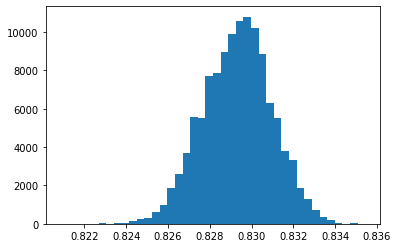

In [134]:
plt.hist(samples_tmp[0, :, 4], bins = 40)

In [13]:
samples_new = samples[2].reshape((-1, 5000, 4))

In [32]:
samples_new = samples[2][:, 500:2200, :].reshape(1, -1, 4)

(array([  78.,  455., 1907., 4296., 6392., 6627., 4695., 1920.,  660.,
         170.]),
 array([0.95881779, 0.99157137, 1.02432496, 1.05707854, 1.08983213,
        1.12258571, 1.15533929, 1.18809288, 1.22084646, 1.25360004,
        1.28635363]),
 <a list of 10 Patch objects>)

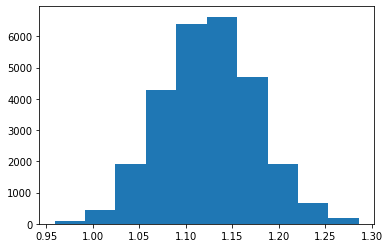

In [33]:
plt.hist(samples_new[0, :, 0])

(array([ 192., 1815., 4705., 6600., 7069., 4449., 1787.,  496.,   69.,
          18.]),
 array([0.96902016, 0.98509573, 1.00117129, 1.01724686, 1.03332242,
        1.04939799, 1.06547355, 1.08154912, 1.09762469, 1.11370025,
        1.12977582]),
 <a list of 10 Patch objects>)

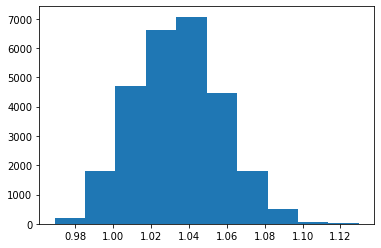

In [35]:
plt.hist(samples_new[0, :, 1])

(array([  92.,  394., 1611., 4079., 5861., 6288., 5435., 2405.,  894.,
         141.]),
 array([0.46511685, 0.47486465, 0.48461246, 0.49436026, 0.50410807,
        0.51385587, 0.52360367, 0.53335148, 0.54309928, 0.55284708,
        0.56259489]),
 <a list of 10 Patch objects>)

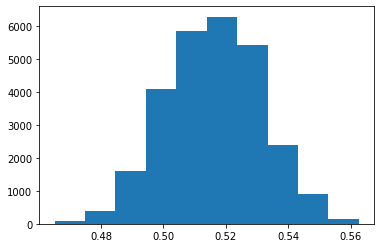

In [34]:
plt.hist(samples_new[0, :, 2])

(array([  82.,  260., 1308., 3342., 5989., 6744., 5905., 2929.,  575.,
          66.]),
 array([0.34244191, 0.35099   , 0.3595381 , 0.36808619, 0.37663429,
        0.38518239, 0.39373048, 0.40227858, 0.41082667, 0.41937477,
        0.42792286]),
 <a list of 10 Patch objects>)

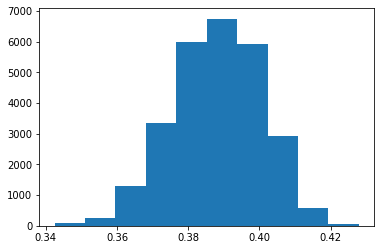

In [36]:
plt.hist(samples_new[0, :, 3])

In [39]:
params[0][0]

array([1.1310825, 1.063528 , 0.509888 , 0.3825516], dtype=float32)

In [58]:
plt.hist(samples[0][:,4])

IndexError: index 4 is out of bounds for axis 1 with size 4

In [53]:
samples[0][:,0]

array([ 1.13108253e+00,  1.50595546e+00,  2.64030037e-04,  1.03945255e+00,
        9.72060680e-01,  1.47717023e+00,  1.62994063e+00, -5.03942907e-01,
        1.46707082e+00, -1.69532347e+00,  4.48494673e-01,  1.04588509e+00,
       -1.45120132e+00, -8.92239332e-01,  1.86450750e-01,  1.46479321e+00,
       -7.90214837e-01,  1.64221418e+00, -6.01738155e-01, -1.68785167e+00,
        1.60145247e+00,  1.03708422e+00,  1.58776748e+00,  8.81571546e-02,
       -5.79399407e-01,  5.74788511e-01,  1.38699383e-01,  1.49429381e+00,
        9.04295266e-01, -1.32516444e+00, -1.40527487e+00, -9.78312850e-01,
        2.89856177e-02, -9.87210393e-01,  1.34342492e+00, -1.68402329e-01,
        1.62008494e-01,  1.43110931e+00, -9.86820817e-01,  7.88139045e-01,
        2.11264491e-01, -1.50952458e+00, -3.22155617e-02,  8.58386159e-01,
        9.04539227e-01,  9.09530222e-01, -1.21955323e+00, -1.52911520e+00,
        8.74643847e-02, -5.99075973e-01, -1.16029930e+00, -2.80007541e-01,
       -1.18576789e+00, -